<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [76]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [77]:
df["species"].nunique()


3

In [78]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Hay 3 especies diferentes.

2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

In [79]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [80]:
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Se extrae un nuevo dataset solo con las filas de datos que están completas

3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?


In [81]:
df.groupby("island").count()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,163,163,163,163,163,163
Dream,123,123,123,123,123,123
Torgersen,47,47,47,47,47,47


Biscoe es la isla con mayor número de pingüinos

4. Repita la pregunta anterior observando las especies.

In [82]:
df.groupby("species").count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119


Gentoo es la especie con mayor número de pingüinos


5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?


In [83]:
df.groupby("species")["bill_length_mm"].agg(["mean","std"])

,mean,std
species,,
Adelie,38.823973,2.662597
Chinstrap,48.833824,3.339256
Gentoo,47.568067,3.106116


6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?



In [84]:
df[df["bill_length_mm"] == df["bill_length_mm"].max()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


El pingüino que tiene el pico más largo es de la especie Gentoo

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?


In [85]:
df.groupby("species")["body_mass_g"].describe()


,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


8. Describa la distribucion con ayuda de la media, desviacion estandard

En promedio, los pingüinos de la especie Gentoo son los más pesados, aunque tiene mucha más variación en su peso que los de la especie Adelie y Chinstrap


9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?



In [86]:
df.groupby("sex")["body_mass_g"].agg(["mean","std"])

,mean,std
sex,,
Female,3862.272727,666.172050
Male,4545.684524,787.628884


In [87]:
media_sexo = df.groupby("sex")["body_mass_g"].agg(["mean", "std"])
diferencia_media = group_stats.loc["Male", "mean"] - group_stats.loc["Female", "mean"]
diferencia_std = group_stats.loc["Male", "std"] - group_stats.loc["Female", "std"]
diferencia_media, diferencia_std


(np.float64(683.4117965367964), np.float64(121.45683464202966))

En promedio los machos poseen más masa corporal que las hembras

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?


In [88]:
df.groupby("species")["flipper_length_mm"].agg(["mean","std"])

,mean,std
species,,
Adelie,190.102740,6.521825
Chinstrap,195.823529,7.131894
Gentoo,217.235294,6.585431


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?



In [89]:
df.groupby("species")["flipper_length_mm"].agg(["min","max"])

,min,max
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?



In [90]:
df1 = df.groupby(["species","island"])["bill_length_mm"].agg(["mean","std"])
df1

mean       std
species   island                        
Adelie    Biscoe     38.975000  2.480916
          Dream      38.520000  2.484276
          Torgersen  39.038298  3.028097
Chinstrap Dream      48.833824  3.339256
Gentoo    Biscoe     47.568067  3.106116

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [91]:
df1.loc[df1["std"]==df1["std"].max()]

,,mean,std
species,island,,
Chinstrap,Dream,48.833824,3.339256


La isla con mayor variación en el pico es Chinstrap


14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.



<Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>

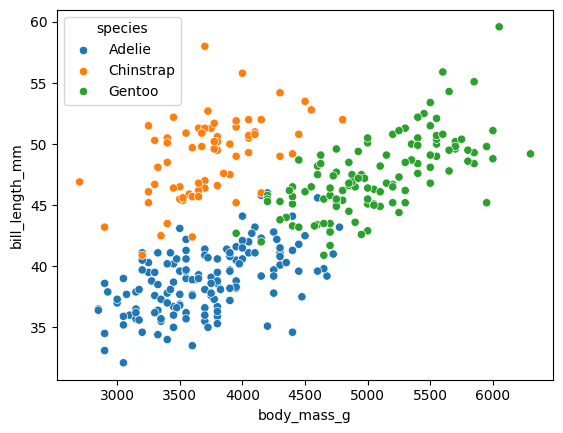

In [92]:
sns.scatterplot(data=df, x="body_mass_g", y="bill_length_mm", hue="species")

De a acuerdo con la gráfica de dispersión, se observa una tendencia en el aumento del pico de los pingüinos, conforme aumenta su masa corporal


15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

---





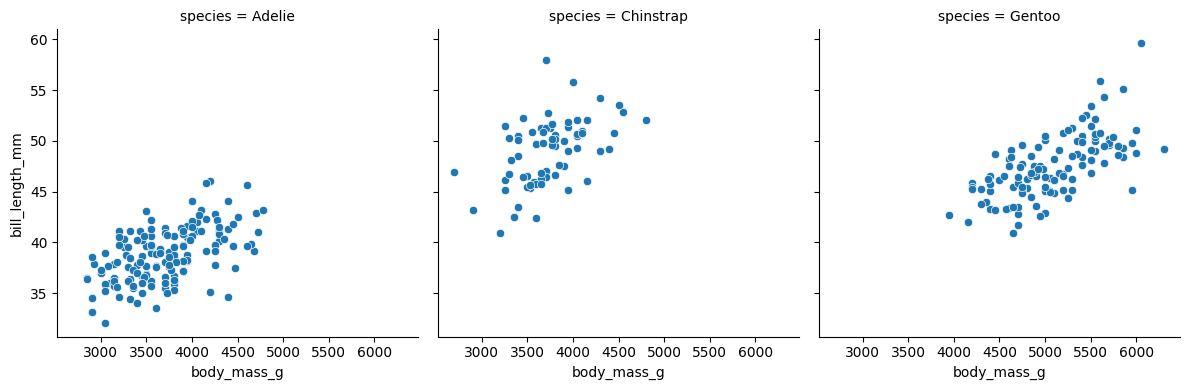

In [93]:
g = sns.FacetGrid(df, col="species", height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x="body_mass_g", y="bill_length_mm")

De las gráficas se observa que, podría inferirse una tendencia de correlación entre la longitud del pico y la masa corporal para cada especie, sin embargo, no es tan clara.

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

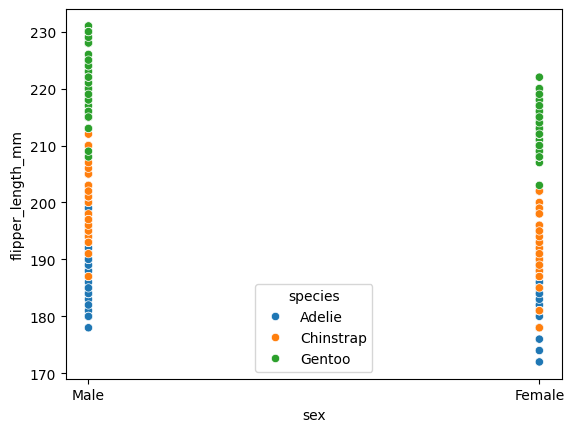

In [94]:
sns.scatterplot(data=df, x="sex", y="flipper_length_mm", hue="species")

Se observa que los machos poseen aletas más grandes que las hembras, lo cual se aplica en promedio para las tres especies


17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

Se usará la distribución t-student para realizar la prueba de hipótesis

Hipótesis nula:la longitud del pico de los pingüinos es independiente de su masa corporal

Hipótesis alternativa: conforme aumenta la masa corporal de los pingüinos, su pico es más largo

In [95]:
#Estimador de la correlacion de Pearson
def pearson_correlation(X, Y):
    """
    Calcula el coeficiente de correlación de Pearson entre dos listas o arrays de datos X e Y.

    Parámetros:
    X -- Lista o array de valores de la variable X.
    Y -- Lista o array de valores de la variable Y.

    Retorna:
    r -- Coeficiente de correlación de Pearson.
    """
    n = len(X)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    sum_XY = np.sum(X * Y)
    numerador = sum_XY - n * mean_X * mean_Y

    # Desviaciones estándar muestrales (n-1 en el denominador)
    std_X = np.std(X, ddof=1)  # ddof=1 para obtener S_x
    std_Y = np.std(Y, ddof=1)  # ddof=1 para obtener S_y

    denominador = (n - 1) * std_X * std_Y
    r = numerador / denominador
    return r


In [96]:
#Determinacion del coeficiente de correlacion
r = pearson_correlation(df["body_mass_g"], df["bill_length_mm"])
print(f'El coeficiente de correlación lineal es: {round(r, 3)}')

El coeficiente de correlación lineal es: 0.589


In [97]:
n = len(df["body_mass_g"])
t = (r*np.sqrt(n-2))/(np.sqrt(1-r**2))
intervalo = stats.t.interval(0.95, n-2, loc=0, scale=1)
print(f'El estimador es: {round(t, 3)}')
print(f'El intervalo es: [ {round(intervalo[0], 4)} , {round(intervalo[1], 4)}]')

El estimador es: 13.276
El intervalo es: [ -1.9672 , 1.9672]


Como el estimador está por fuera del intervalo, luego se rechaza la hipótesis nula, es decir, se puede inferir que conforme aunmenta la masa corporal de los pingüinos, estos poseen un pico más largo